# Setting

## Load libraries

In [35]:
# Load library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load library for data precessing
import pandas as pd  

## Set figure size

In [37]:
plt.rcParams['figure.figsize'] = [15, 10]

# 連續資料

## 一維資料

In [38]:
# Beijing air pollution data downloaded in 
# https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data
df = pd.read_csv('Data/PRSA_Data_Shunyi_20130301-20170228.csv')  
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

### 直方圖 Histogram 

ValueError: cannot convert float NaN to integer

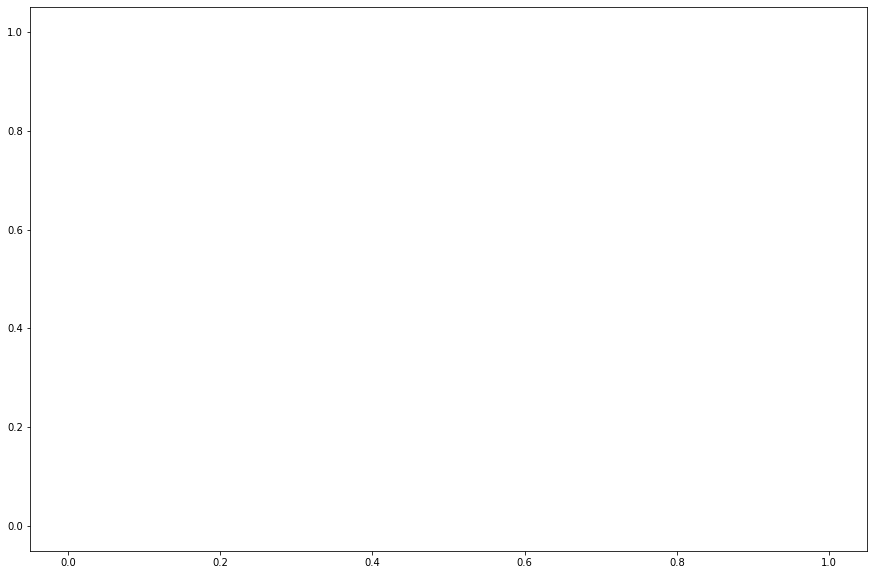

In [39]:
# Data with NaN
sns.distplot(df['PM2.5'])

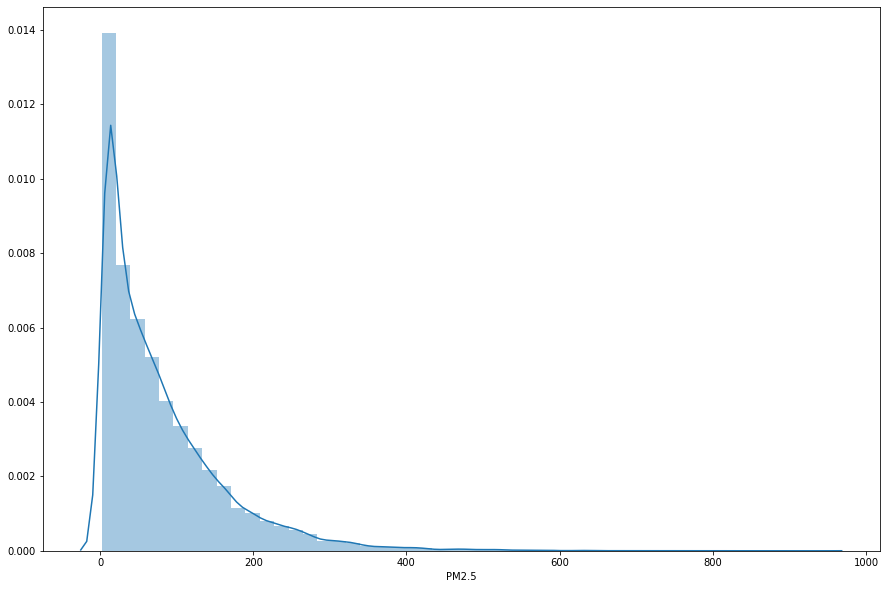

In [40]:
# Remove NaN by .dropna()
sns.distplot(df['PM2.5'].dropna())
plt.show()

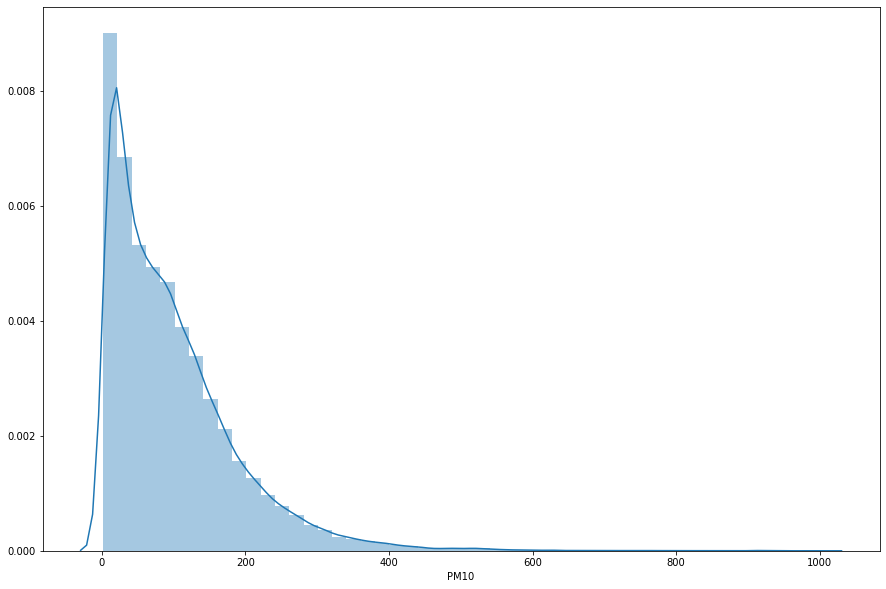

In [41]:
sns.distplot(df['PM10'].dropna())
plt.show()

In [42]:
# Parse String To DateTime
df['DateTime']=pd.to_datetime(df['year'].map(str) +'/'+df['month'].map(str) +'/'+df['day'].map(str) +
               ' '+df['hour'].map(str)+':'+'00', 
               format='%Y/%m/%d %H:%M')

## 二維資料

### 折線圖 Line chart

如何呈現**每天** **PM2.5濃度**的變化？

可使用seaborn的`lineplot`函數畫折線圖

- x軸：日期
- y軸：PM2.5濃度


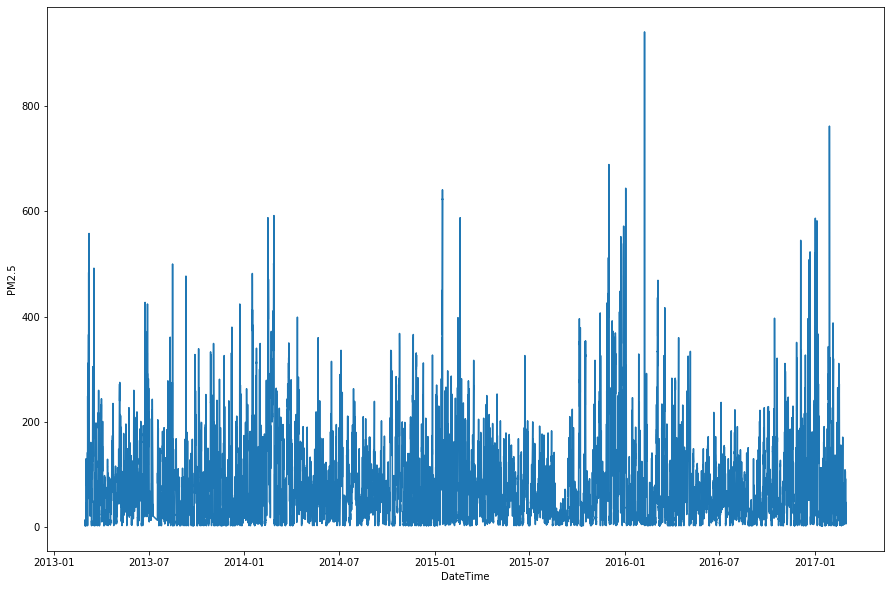

In [43]:
sns.lineplot(x=df['DateTime'], y=df['PM2.5'])
plt.show()

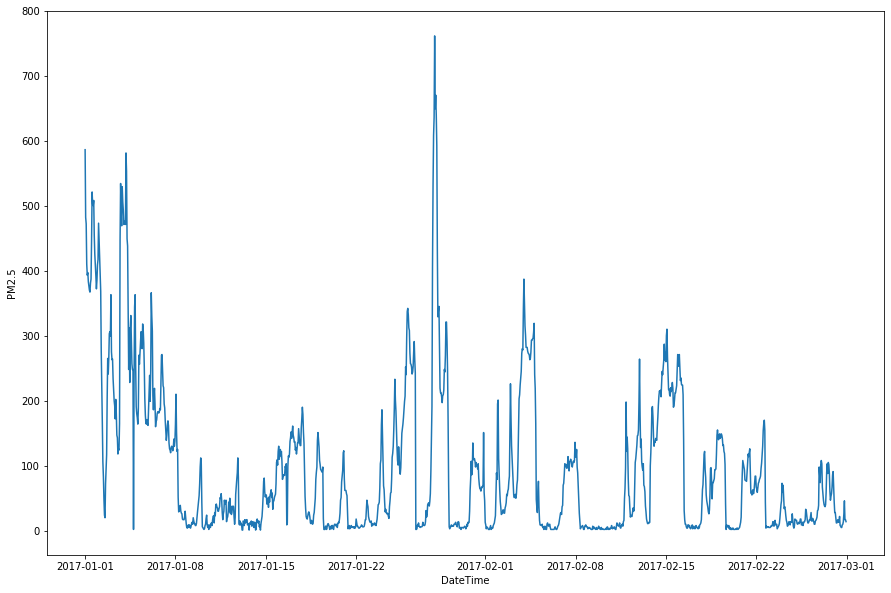

In [44]:
df2017=df.loc[((df['year']==2017) & (df['month']<=6))]
sns.lineplot(df2017['DateTime'], df2017['PM2.5'])
plt.show()

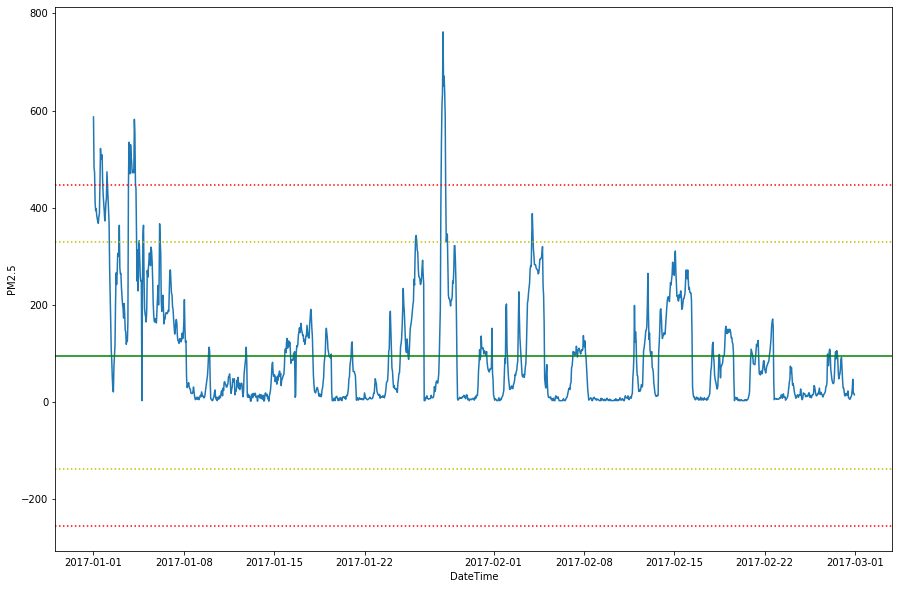

In [45]:


sns.lineplot(df2017['DateTime'], df2017['PM2.5'])
plt.axhline(y=df2017['PM2.5'].mean(skipna=True), color='g', linestyle='-')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)+2*df2017['PM2.5'].std(ddof=0), color='y', linestyle=':')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)-2*df2017['PM2.5'].std(ddof=0), color='y', linestyle=':')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)+3*df2017['PM2.5'].std(ddof=0), color='r', linestyle=':')
plt.axhline(y=df2017['PM2.5'].mean(skipna=True)-3*df2017['PM2.5'].std(ddof=0), color='r', linestyle=':')
plt.show()

### 散佈圖 Scatter plot 

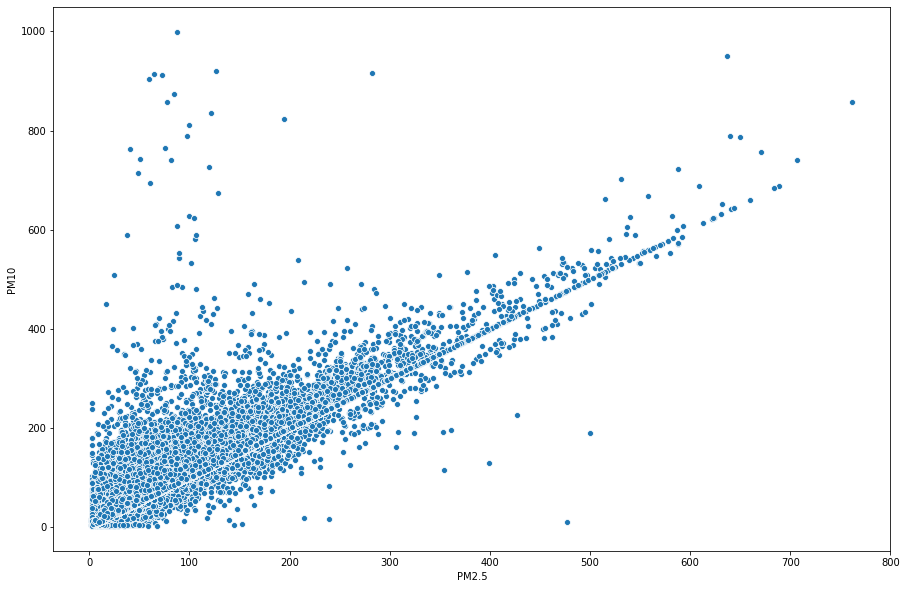

In [46]:
sns.scatterplot(df['PM2.5'],df['PM10'])
plt.show()

### 散佈圖 Scatter plot + 迴歸線

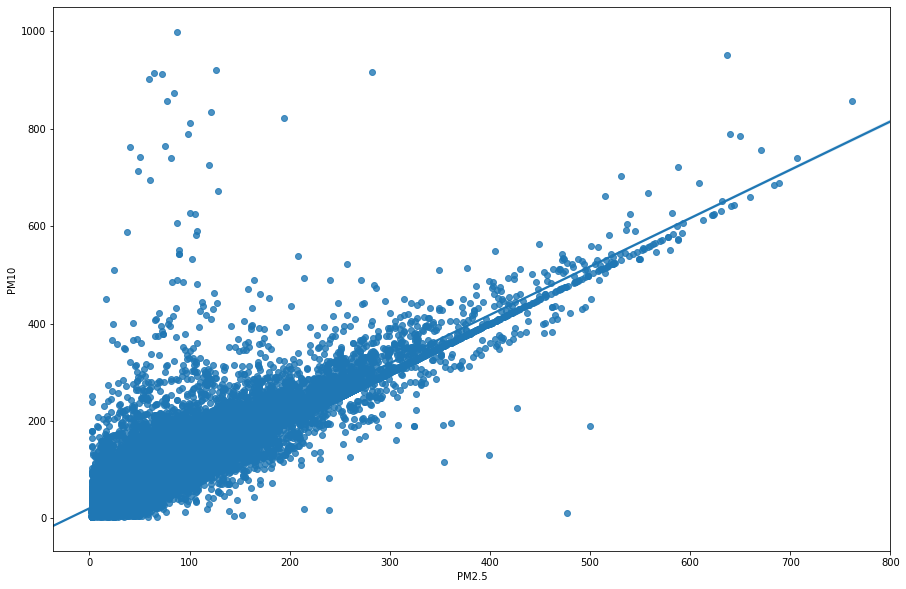

In [47]:
sns.regplot(df['PM2.5'],df['PM10'])
plt.show()

### 一次畫多個散佈圖 Pair plot

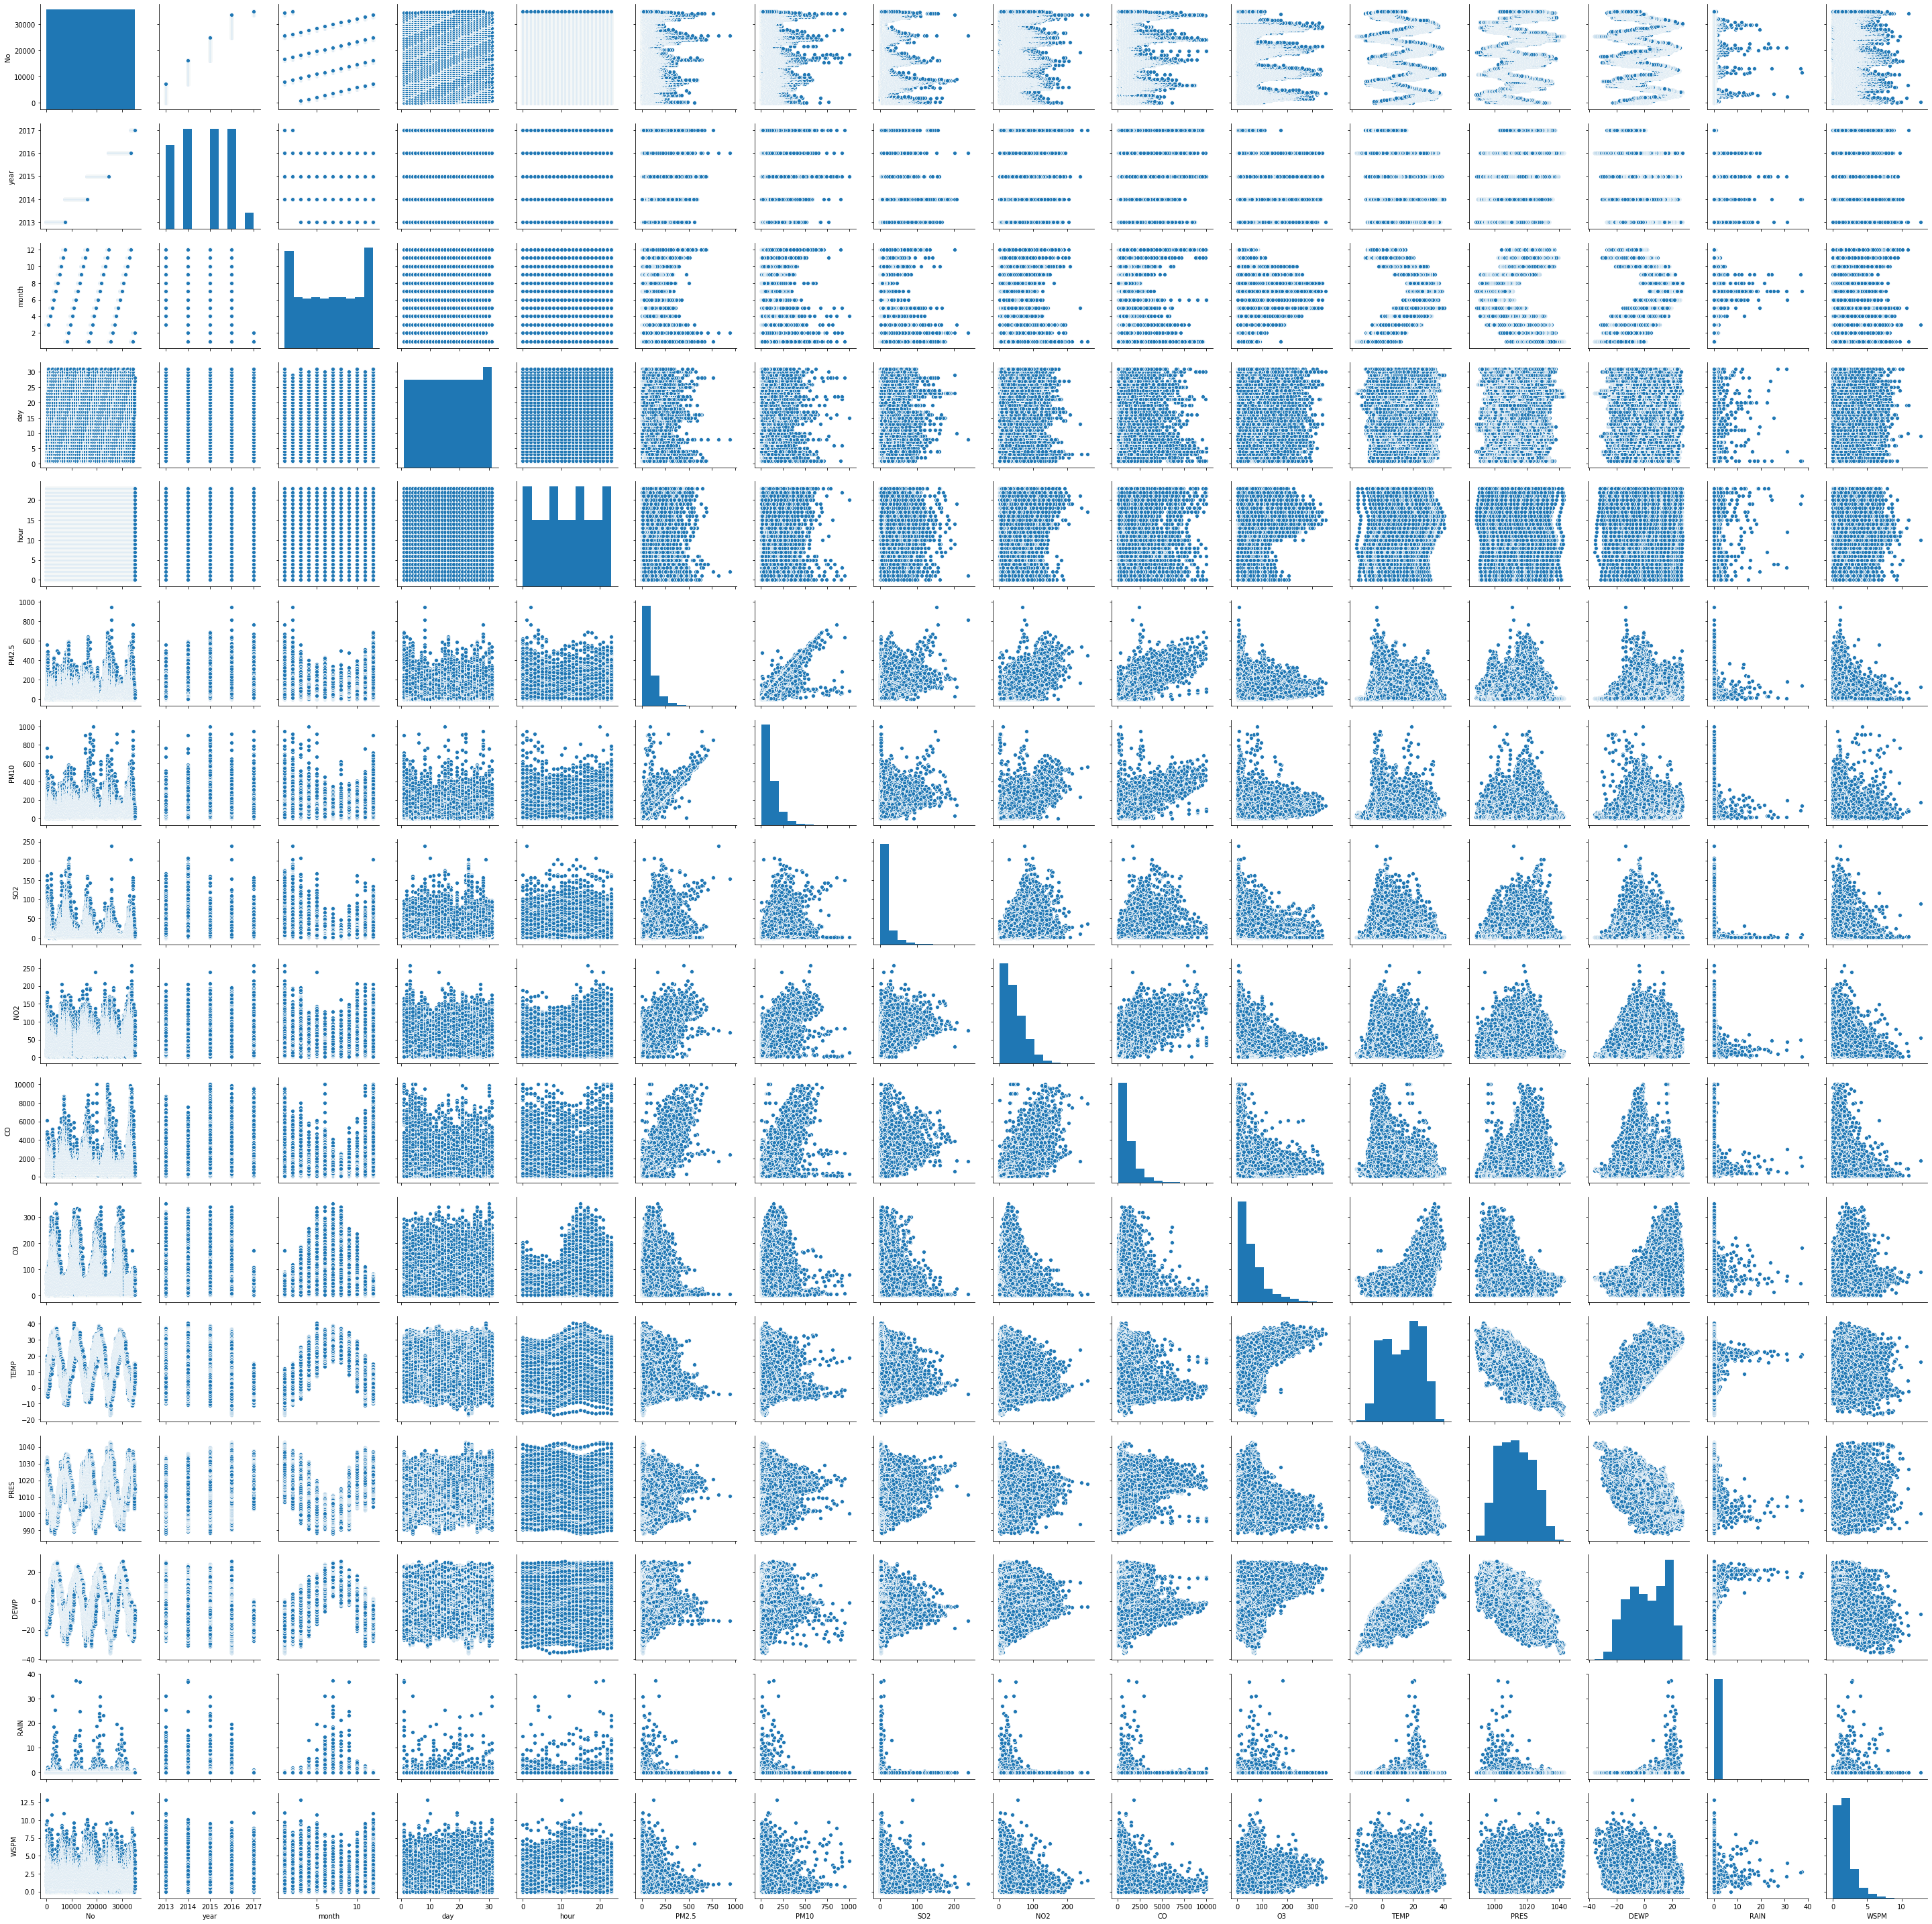

In [48]:

sns.pairplot(df)
plt.show()

## 連續+類別資料

### 圓餅圖 Pie chart

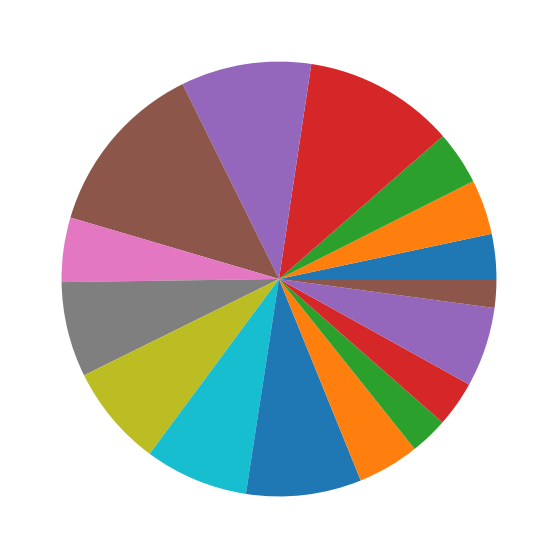

In [49]:
plt.pie(df.groupby('wd').size())
plt.show()

Bar chart is better in this case.....

### 長條圖 Bar chart 

In [50]:
wd_count=df.groupby('wd').size().to_frame(name="count").reset_index()

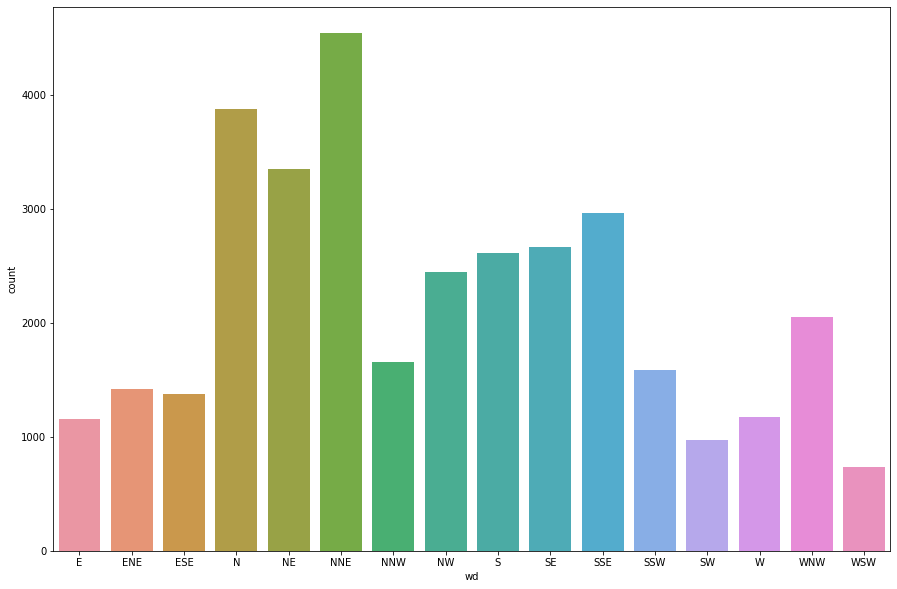

In [51]:
sns.barplot(wd_count['wd'],wd_count['count'])
plt.show()

### 盒鬚圖 Box plot

**每年** **PM2.5濃度** 的分佈（中位數、四分位差、離群值等）是否有差異？

- x軸：年份
- y軸：PM2.5濃度
- 盒（方塊）中線：中位數
- 盒（方塊）上緣：第三 四分位差
- 盒（方塊）下緣：第一 四分位差
- 鬚（線條）上緣：
- 鬚（線條）下緣：
- 點：離群值

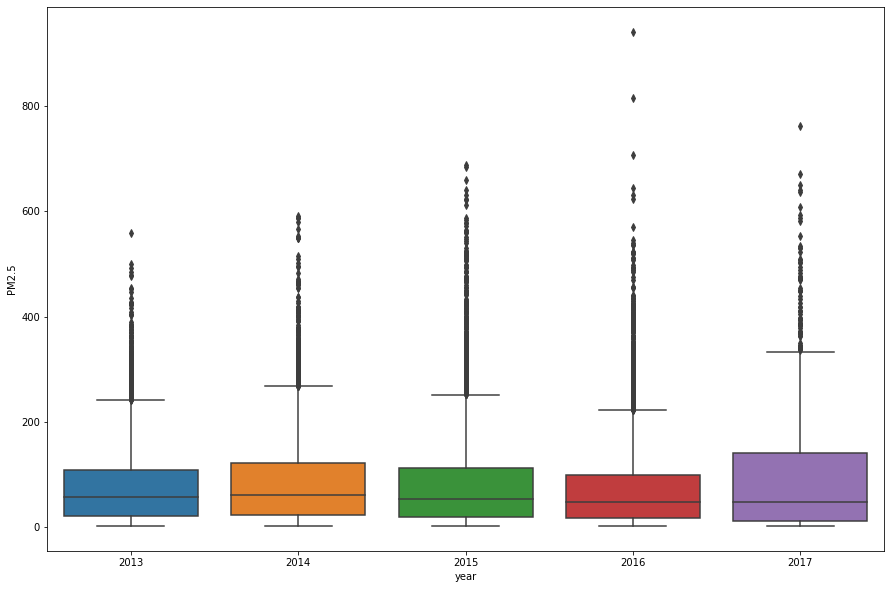

In [52]:
sns.boxplot( x=df["year"], y=df["PM2.5"] )
plt.show()

## 多維資料

In [53]:
# Energy efficiency Data Set downloaded in
# https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
df_e = pd.read_csv('Data/ENB2012_data.csv')  
df_e.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

### 熱度圖 Heatmap

### 矩形圖 Tree map

## 圖形樣式參數設定

### 顏色

### 點的樣式

### 線的樣式

### 圖例

### XY軸的名字

### 標題

## 圖形匯出與分享

### 儲存

### plotly互動網頁製作與儲存